In [ ]:
import numpy as np #libreria principal para la informática científica
import pandas as pd # libreria especializada en el manejo y análsis de estructura de datos
import matplotlib.pyplot as plt #Libreria para la creación de gráficos en 2d
from sklearn import linear_model # Es la libreria mas útil para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
plt.style.use('ggplot')# Estilo para la creación de gráficos

In [ ]:
data=pd.read_csv('census.csv')# Creando el dataframe(data) 
data.head()# Mostrar las 5 primeras filas del dataframe

,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
data.shape #Conocer el número de filas y columnas que tiene el dataframe

(32560, 12)

In [ ]:
# Veamos el nivel de poblamiento de las variables para conocer si hay datos nulos.
#  use data.count(0) para obtener el número de filas sin datos nulos.
#  use data.shape[0] para obtener el número de filas.
data.count(0)/data.shape[0]*100
# El resultado nos indica que casi todos tienen un poblamiento al 100%

age                 100.000000
workclass            94.361179
education           100.000000
education_num       100.000000
marital_status      100.000000
occupation           94.339681
relationship        100.000000
race                100.000000
gender              100.000000
hours_per_week      100.000000
native_country       98.209459
greater_than_50k    100.000000
dtype: float64

In [ ]:
data.head()


,age,workclass,education,education_num,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
del data['education_num']
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
data.shape

(32560, 11)

In [ ]:
data[data.greater_than_50k == 1].head()# trabajadores que ganan mas de 50k tiene el valor 1
# si observamos el resultado podemos saber que los trabajadores de mayor edad son los que ganan más.

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
7,52,Self-emp-not-inc,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,45,United-States,1
8,31,Private,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,50,United-States,1
9,42,Private,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,40,United-States,1
10,37,Private,Some-college,Married-civ-spouse,Exec-managerial,Husband,Black,Male,80,United-States,1
11,30,State-gov,Bachelors,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,40,India,1


In [ ]:
data[data.greater_than_50k == 1].age.values # trabajadores que ganan mas de 50k tiene el valor 1

array([52, 31, 42, ..., 53, 40, 52])

Text(0, 0.5, 'Frecuencia')

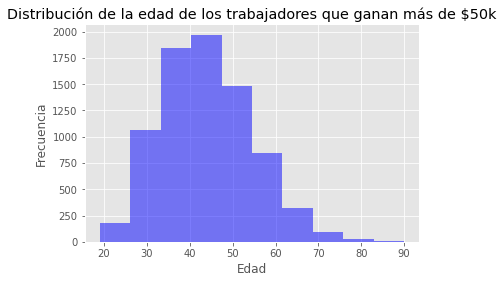

In [ ]:
# Creando gráfico tipo Histograma para mostrar a los trabajadores que ganan mas de $50k.
hist_above_50=plt.hist(data[data.greater_than_50k == 1].age.values,10,facecolor='blue',alpha=0.5)
plt.title('Distribución de la edad de los trabajadores que ganan más de $50k')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# Observando el gráfico se puede ver que los trabajadores que ganan mas de 50k se concentran 
# entre los 35 y 55 años de edad. 

Text(0, 0.5, 'Frecuencia')

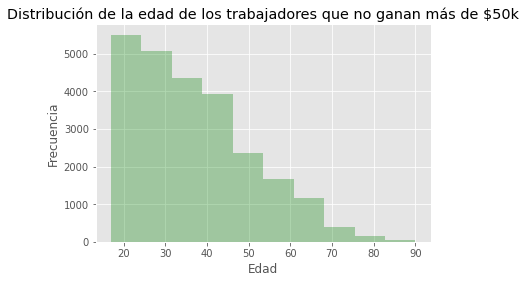

In [ ]:
# Creando gráfico tipo Histograma para mostrar a los trabajadores que no ganan mas de $50k.
hist_below_50=plt.hist(data[data.greater_than_50k == 0].age.values,10,facecolor='green',alpha=0.3)
plt.title('Distribución de la edad de los trabajadores que no ganan más de $50k')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# En el resultado del gráfico se observa que los trabajadores que ganan menos de 50k se concentran 
# los 20 y 30 años

In [ ]:
# Conteo agrupando por la variable workclass(clase de trabajo)
data[data.greater_than_50k==1].groupby('workclass').workclass.count()

workclass
 Federal-gov          371
 Local-gov            617
 Private             4963
 Self-emp-inc         622
 Self-emp-not-inc     724
 State-gov            353
Name: workclass, dtype: int64

In [ ]:
data[data.greater_than_50k==0].groupby('workclass').workclass.count()

workclass
 Federal-gov           589
 Local-gov            1476
 Never-worked            7
 Private             17732
 Self-emp-inc          494
 Self-emp-not-inc     1817
 State-gov             945
 Without-pay            14
Name: workclass, dtype: int64

In [ ]:
# Hipotesis 1: Los ingresos varían dependiendo del tipo de empleo
# guardar en la variable dist_data el conteo, agrupando por clase de trabajo de 
# aquellos trabajadores que ganan mas de 50k y los que no ganan mas de 50k
dist_data=pd.concat([data[data.greater_than_50k==1].groupby('workclass').workclass.count(),
                     data[data.greater_than_50k==0].groupby('workclass').workclass.count()], axis=1)
dist_data.columns=['wk_class_gt50','wk_class_lt50']# Nombrando las columnas
dist_data #Imprimir la data

,wk_class_gt50,wk_class_lt50
Federal-gov,371.0,589
Local-gov,617.0,1476
Private,4963.0,17732
Self-emp-inc,622.0,494
Self-emp-not-inc,724.0,1817
State-gov,353.0,945
Never-worked,NaN,7
Without-pay,NaN,14


In [ ]:
# dist_data_final= ganan mas 50k / (ganan mas de 50k + no ganan mas de 50k)
dist_data_final=dist_data.wk_class_gt50/(dist_data.wk_class_gt50 + dist_data.wk_class_lt50)
dist_data_final

 Federal-gov         0.386458
 Local-gov           0.294792
 Private             0.218683
 Self-emp-inc        0.557348
 Self-emp-not-inc    0.284927
 State-gov           0.271957
 Never-worked             NaN
 Without-pay              NaN
dtype: float64

Text(0, 0.5, '% de personas')

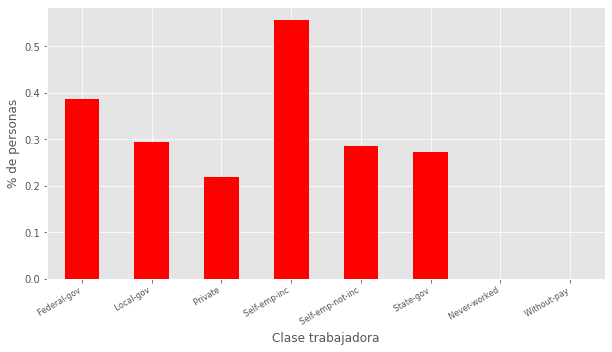

In [ ]:
plt.figure(figsize=(10,5)) # configurando el tamaño del gráfico. ancho, alto
ax=dist_data_final.plot(kind='bar', color='r' , y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Clase trabajadora')
ax.set_ylabel('% de personas')
# Observando el resultado del gráfico: las personas laboralmente independientes con empresa
# son los que ganan mas, seguidos por los empleados del gobierno federal.

In [ ]:
# Hipotesis 2: Personas con mas education(educacion) ganan mas
dist_data=pd.concat([data[data.greater_than_50k==1].groupby('education').education.count(),
                     data[data.greater_than_50k==0].groupby('education').education.count()], axis=1)
dist_data.columns=['education_gt50','education_lt50']# Nombrando las columnas
dist_data #Imprimir la data
dist_data_final=dist_data.education_gt50/(dist_data.education_gt50 + dist_data.education_lt50)
dist_data_final

 10th            0.066452
 11th            0.051064
 12th            0.076212
 1st-4th         0.035714
 5th-6th         0.048048
 7th-8th         0.061920
 9th             0.052529
 Assoc-acdm      0.248360
 Assoc-voc       0.261216
 Bachelors       0.414753
 Doctorate       0.740920
 HS-grad         0.159509
 Masters         0.556587
 Prof-school     0.734375
 Some-college    0.190261
 Preschool            NaN
dtype: float64

Text(0, 0.5, '% de personas')

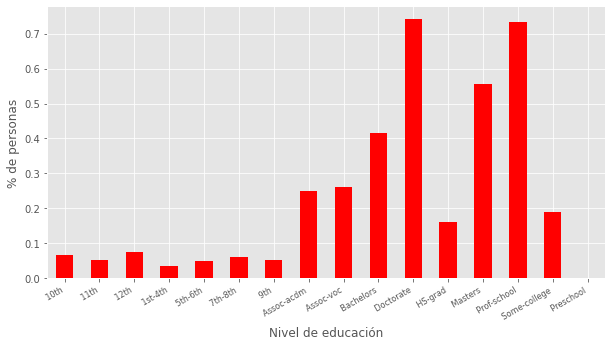

In [ ]:
plt.figure(figsize=(10,5)) # configurando el tamaño del gráfico. ancho, alto
ax=dist_data_final.plot(kind='bar', color='r' , y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Nivel de educación')
ax.set_ylabel('% de personas')

In [ ]:
# Hipotesis 3: Las personas casadas suelen ganar más
dist_data=pd.concat([data[data.greater_than_50k==1].groupby('marital_status').marital_status.count(),
                     data[data.greater_than_50k==0].groupby('marital_status').marital_status.count()], axis=1)
dist_data.columns=['marital_status_gt50','marital_status_lt50']# Nombrando las columnas
dist_data #Imprimir la data
dist_data_final=dist_data.marital_status_gt50/(dist_data.marital_status_gt50 + dist_data.marital_status_lt50)
dist_data_final

marital_status
 Divorced                 0.104209
 Married-AF-spouse        0.434783
 Married-civ-spouse       0.446848
 Married-spouse-absent    0.081340
 Never-married            0.045965
 Separated                0.064390
 Widowed                  0.085599
dtype: float64

Text(0, 0.5, '% de personas')

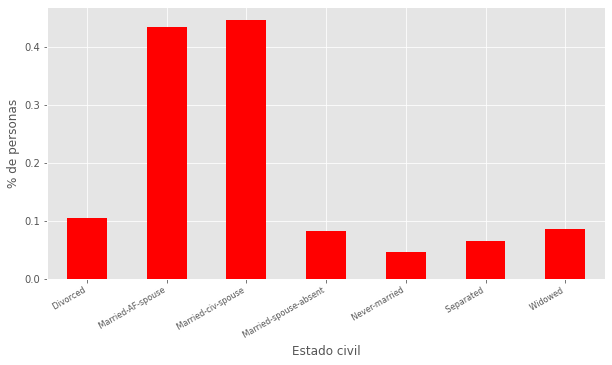

In [ ]:
plt.figure(figsize=(10,5)) # configurando el tamaño del gráfico. ancho, alto
ax=dist_data_final.plot(kind='bar', color='r' , y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Estado civil')
ax.set_ylabel('% de personas')

In [ ]:
# Hipotesis 4: Los ingresos dependen de la ocupacion del trabajador
dist_data=pd.concat([data[data.greater_than_50k==1].groupby('occupation').occupation.count(),
                     data[data.greater_than_50k==0].groupby('occupation').occupation.count()], axis=1)
dist_data.columns=['occupation_gt50','occupation_lt50']# Nombrando las columnas
dist_data #Imprimir la data
dist_data_final=dist_data.occupation_gt50/(dist_data.occupation_gt50 + dist_data.occupation_lt50)
dist_data_final

occupation
 Adm-clerical         0.134483
 Armed-Forces         0.111111
 Craft-repair         0.226641
 Exec-managerial      0.484014
 Farming-fishing      0.115694
 Handlers-cleaners    0.062774
 Machine-op-inspct    0.124938
 Other-service        0.041578
 Priv-house-serv      0.006711
 Prof-specialty       0.449034
 Protective-serv      0.325116
 Sales                0.269315
 Tech-support         0.304957
 Transport-moving     0.200376
dtype: float64

Text(0, 0.5, '% de personas')

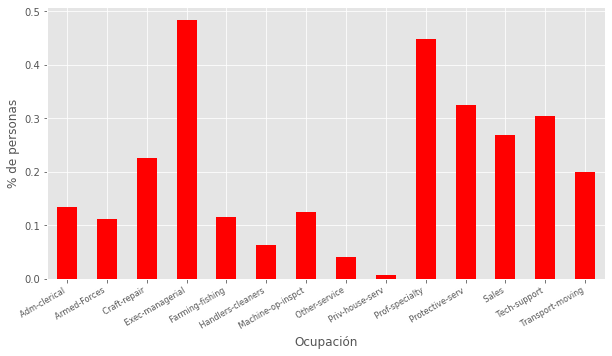

In [ ]:
plt.figure(figsize=(10,5)) # configurando el tamaño del gráfico. ancho, alto
ax=dist_data_final.plot(kind='bar', color='r' , y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Ocupación')
ax.set_ylabel('% de personas')

In [ ]:
# Hipotesis 5: Los hombres ganan más
dist_data=pd.concat([data[data.greater_than_50k==1].groupby('gender').gender.count(),
                     data[data.greater_than_50k==0].groupby('gender').gender.count()], axis=1)
dist_data.columns=['gender_gt50','gender_lt50']# Nombrando las columnas
dist_data #Imprimir la data
dist_data_final=dist_data.gender_gt50/(dist_data.gender_gt50 + dist_data.gender_lt50)
dist_data_final

gender
 Female    0.109471
 Male      0.305737
dtype: float64

Text(0, 0.5, '% de personas')

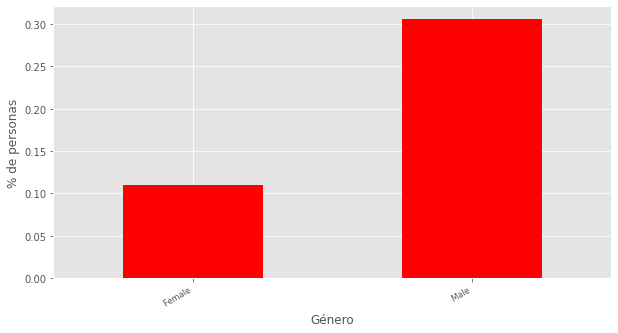

In [ ]:
plt.figure(figsize=(10,5)) # configurando el tamaño del gráfico. ancho, alto
ax=dist_data_final.plot(kind='bar', color='r' , y='Percentage')
ax.set_xticklabels(dist_data_final.index, rotation=30, fontsize=8, ha='right')
ax.set_xlabel('Género')
ax.set_ylabel('% de personas')

In [ ]:
data.shape

(32560, 11)

In [ ]:
data.columns

Index(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week', 'native_country',
       'greater_than_50k'],
      dtype='object')

In [ ]:
data.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0


In [ ]:
# Tener en cuenta que python para poder encontrar un perfil no permite usar variables "categoricas".
# para procesar el arbol, python necesitara variables "NUMERICAS", entonces para hacer la conversión puede usar 
# dummies, método que distribuira una variable en varias. por ejemplo la variable raza se dividira
# en 3 columnas: blanca, negra, asiatica

In [ ]:
workclass_dummies=pd.get_dummies(data.workclass, prefix='Wkc_')
workclass_dummies.head()
# En el resultado del dummies se observan ceros y unos. el valor 1 es el que cumple y 0
# es el que no cumple.

,Wkc__ Federal-gov,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0,0
3,0,0,0,1,0,0,0,0
4,0,0,0,1,0,0,0,0


In [ ]:
# Para optimizar los datos, se recomienda eliminar una de las columnas donde todas las filas sea 0.
# en nuestro ejemplo puede ser la columna federal_gov(0).
workclass_dummies.drop(workclass_dummies.columns[0],axis=1,inplace=True)
workclass_dummies.head()

,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0


In [ ]:
# Concatenar el dataframe original(data) y el dummies
data_census0=pd.concat([data,workclass_dummies],axis=1)
data_census0.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0


In [ ]:
# Crear un dataframe dummies para la variable education
educ_dummies = pd.get_dummies(data.education, prefix='educ_')
educ_dummies.drop(educ_dummies.columns[0],axis=1,inplace=True)
educ_dummies.head()

,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census1 = pd.concat([data_census0,educ_dummies], axis=1)
data_census1.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
#create a DataFrame of dummy variables for marital_status
ms_dummies = pd.get_dummies(data.marital_status, prefix='ms_')
ms_dummies.drop(ms_dummies.columns[0],axis=1,inplace=True)# Tambien se debe eliminar la columna 0
ms_dummies.head()

,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census2 = pd.concat([data_census1,ms_dummies], axis=1)
data_census2.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for occupation
oc_dummies = pd.get_dummies(data.occupation, prefix='oc_')
oc_dummies.drop(oc_dummies.columns[0],axis=1,inplace=True) # Tambien se debe eliminar la columna 0
oc_dummies.head()


,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame\n",
data_census3 = pd.concat([data_census2,oc_dummies], axis=1)
data_census3.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [ ]:
# create a DataFrame of dummy variables for relationship\n",
rs_dummies = pd.get_dummies(data.relationship, prefix='rs_')
rs_dummies.drop(rs_dummies.columns[0],axis=1,inplace=True)# Tambien se debe eliminar la columna 0
rs_dummies.head()

,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census4 = pd.concat([data_census3,rs_dummies], axis=1)
data_census4.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
# create a DataFrame of dummy variables for race\n",
race_dummies = pd.get_dummies(data.race, prefix='race_')
race_dummies.drop(race_dummies.columns[0],axis=1,inplace=True)# Tambien se debe eliminar la columna 0
race_dummies.head()

,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census5 = pd.concat([data_census4,race_dummies], axis=1)
data_census5.head()


,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0


In [ ]:
# create a DataFrame of dummy variables for gender
gender_dummies = pd.get_dummies(data.gender, prefix='gender_')
gender_dummies.drop(gender_dummies.columns[0],axis=1,inplace=True)# Tambien se debe eliminar la columna 0
gender_dummies.head()

,gender__ Male
0,1
1,1
2,1
3,1
4,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census6 = pd.concat([data_census5,gender_dummies], axis=1)
data_census6.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,oc__ Craft-repair,oc__ Exec-managerial,oc__ Farming-fishing,oc__ Handlers-cleaners,oc__ Machine-op-inspct,oc__ Other-service,oc__ Priv-house-serv,oc__ Prof-specialty,oc__ Protective-serv,oc__ Sales,oc__ Tech-support,oc__ Transport-moving,rs__ Not-in-family,rs__ Other-relative,rs__ Own-child,rs__ Unmarried,rs__ Wife,race__ Asian-Pac-Islander,race__ Black,race__ Other,race__ White,gender__ Male
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0


In [ ]:
# create a DataFrame of dummy variables for country
country_dummies = pd.get_dummies(data.native_country, prefix='nc_')
country_dummies.drop(country_dummies.columns[0],axis=1,inplace=True)# Tambien se debe eliminar la columna 0
country_dummies.head()


,nc__ Canada,nc__ China,nc__ Columbia,nc__ Cuba,nc__ Dominican-Republic,nc__ Ecuador,nc__ El-Salvador,nc__ England,nc__ France,nc__ Germany,nc__ Greece,nc__ Guatemala,nc__ Haiti,nc__ Honduras,nc__ Hong,nc__ Hungary,nc__ India,nc__ Iran,nc__ Ireland,nc__ Italy,nc__ Jamaica,nc__ Japan,nc__ Laos,nc__ Mexico,nc__ Nicaragua,nc__ Outlying-US(Guam-USVI-etc),nc__ Peru,nc__ Philippines,nc__ Poland,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# concatenate the original DataFrame and the dummy DataFrame
data_census7 = pd.concat([data_census6,country_dummies], axis=1)
data_census7.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,hours_per_week,native_country,greater_than_50k,Wkc__ Local-gov,Wkc__ Never-worked,Wkc__ Private,Wkc__ Self-emp-inc,Wkc__ Self-emp-not-inc,Wkc__ State-gov,Wkc__ Without-pay,educ__ 11th,educ__ 12th,educ__ 1st-4th,educ__ 5th-6th,educ__ 7th-8th,educ__ 9th,educ__ Assoc-acdm,educ__ Assoc-voc,educ__ Bachelors,educ__ Doctorate,educ__ HS-grad,educ__ Masters,educ__ Preschool,educ__ Prof-school,educ__ Some-college,ms__ Married-AF-spouse,ms__ Married-civ-spouse,ms__ Married-spouse-absent,ms__ Never-married,ms__ Separated,ms__ Widowed,oc__ Armed-Forces,...,gender__ Male,nc__ Canada,nc__ China,nc__ Columbia,nc__ Cuba,nc__ Dominican-Republic,nc__ Ecuador,nc__ El-Salvador,nc__ England,nc__ France,nc__ Germany,nc__ Greece,nc__ Guatemala,nc__ Haiti,nc__ Honduras,nc__ Hong,nc__ Hungary,nc__ India,nc__ Iran,nc__ Ireland,nc__ Italy,nc__ Jamaica,nc__ Japan,nc__ Laos,nc__ Mexico,nc__ Nicaragua,nc__ Outlying-US(Guam-USVI-etc),nc__ Peru,nc__ Philippines,nc__ Poland,nc__ Portugal,nc__ Puerto-Rico,nc__ Scotland,nc__ South,nc__ Taiwan,nc__ Thailand,nc__ Trinadad&Tobago,nc__ United-States,nc__ Vietnam,nc__ Yugoslavia
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,40,United-States,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,13,United-States,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,40,United-States,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,40,United-States,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,40,Cuba,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data_census7.columns.values
# la data final seria data_census7 y ya esta listo. para entrenar mi arbol final.

array(['age', 'workclass', 'education', 'marital_status', 'occupation',
       'relationship', 'race', 'gender', 'hours_per_week',
       'native_country', 'greater_than_50k', 'Wkc__ Local-gov',
       'Wkc__ Never-worked', 'Wkc__ Private', 'Wkc__ Self-emp-inc',
       'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov', 'Wkc__ Without-pay',
       'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th', 'educ__ 5th-6th',
       'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
       'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
       'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
       'educ__ Prof-school', 'educ__ Some-college',
       'ms__ Married-AF-spouse', 'ms__ Married-civ-spouse',
       'ms__ Married-spouse-absent', 'ms__ Never-married',
       'ms__ Separated', 'ms__ Widowed', 'oc__ Armed-Forces',
       'oc__ Craft-repair', 'oc__ Exec-managerial',
       'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
       'oc__ Machine-op-inspct', 'oc__ Other-service',
    

In [ ]:
# Ahora deberá quedarse con las variables numericas. features significa caracteristicas
features = ['age','hours_per_week',
    'Wkc__ Local-gov', 'Wkc__ Never-worked', 'Wkc__ Private',
    'Wkc__ Self-emp-inc', 'Wkc__ Self-emp-not-inc', 'Wkc__ State-gov',
           'Wkc__ Without-pay', 'educ__ 11th', 'educ__ 12th', 'educ__ 1st-4th',
           'educ__ 5th-6th', 'educ__ 7th-8th', 'educ__ 9th', 'educ__ Assoc-acdm',
           'educ__ Assoc-voc', 'educ__ Bachelors', 'educ__ Doctorate',
           'educ__ HS-grad', 'educ__ Masters', 'educ__ Preschool',
           'educ__ Prof-school', 'educ__ Some-college', 'ms__ Married-AF-spouse',
           'ms__ Married-civ-spouse', 'ms__ Married-spouse-absent',
           'ms__ Never-married', 'ms__ Separated', 'ms__ Widowed',
           'oc__ Armed-Forces', 'oc__ Craft-repair', 'oc__ Exec-managerial',
           'oc__ Farming-fishing', 'oc__ Handlers-cleaners',
           'oc__ Machine-op-inspct', 'oc__ Other-service', 'oc__ Priv-house-serv',
           'oc__ Prof-specialty', 'oc__ Protective-serv', 'oc__ Sales',
           'oc__ Tech-support', 'oc__ Transport-moving', 'rs__ Not-in-family',
           'rs__ Other-relative', 'rs__ Own-child', 'rs__ Unmarried', 'rs__ Wife',
           'race__ Asian-Pac-Islander', 'race__ Black', 'race__ Other',
           'race__ White', 'gender__ Male', 'nc__ Canada', 'nc__ China',
           'nc__ Columbia', 'nc__ Cuba', 'nc__ Dominican-Republic', 'nc__ Ecuador',
           'nc__ El-Salvador', 'nc__ England', 'nc__ France', 'nc__ Germany',
           'nc__ Greece', 'nc__ Guatemala', 'nc__ Haiti', 'nc__ Honduras',
           'nc__ Hong', 'nc__ Hungary', 'nc__ India', 'nc__ Iran', 'nc__ Ireland',
           'nc__ Italy', 'nc__ Jamaica', 'nc__ Japan', 'nc__ Laos', 'nc__ Mexico',
           'nc__ Nicaragua', 'nc__ Outlying-US(Guam-USVI-etc)', 'nc__ Peru',
           'nc__ Philippines', 'nc__ Poland', 'nc__ Portugal', 'nc__ Puerto-Rico',
           'nc__ Scotland', 'nc__ South', 'nc__ Taiwan', 'nc__ Thailand',
           'nc__ Trinadad&Tobago', 'nc__ United-States', 'nc__ Vietnam',
           'nc__ Yugoslavia']

In [ ]:
#CREANDO EL ARBOL DE DECISION:
#para entrenar el arbol debemos dividir el dataframe data_census7 en dos grupos: aprendizaje(Train) y pruebas(Test)
#el primer grupo seria X (variable independiente) la cual contendra todas las variables del dataframe data_census7, excepto
#la variable greather_than_50k. En el otro grupo seria solo lo que se quiere predecir, es decir la variable 'y' (variable dependiente)
X=data_census7[features].values #X almacena todas las variables del dataframe data_census7
X

array([[39, 40,  0, ...,  1,  0,  0],
       [50, 13,  0, ...,  1,  0,  0],
       [38, 40,  0, ...,  1,  0,  0],
       ...,
       [58, 40,  0, ...,  1,  0,  0],
       [22, 20,  0, ...,  1,  0,  0],
       [52, 40,  0, ...,  1,  0,  0]])

In [ ]:
y=data_census7['greater_than_50k'].values
y

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
# Usando la tecnica train_test_split, permite dividir la data.
# para dividir la data usaremos el 70% para entrenamiento y el 30% para las pruebas.
# X_train tendria el 70% de las filas con todas las variables --> usado en el metodo fit
# X_test tendria el 30% de las filas con todas las variables --> usado para hacer la prediccion
# y_train con el 70% de filas pero solo con la variable greater_than_50k --> usado en el metodo fit
# y_test tendria el 30% de filas pero solo con la variable greater_than_50k --> conocer la performance del modelo para la prediccion
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=100)
X_train


array([[28, 40,  0, ...,  1,  0,  0],
       [46, 38,  0, ...,  1,  0,  0],
       [56, 15,  0, ...,  1,  0,  0],
       ...,
       [32, 50,  0, ...,  0,  0,  0],
       [23, 36,  0, ...,  0,  0,  0],
       [35, 40,  0, ...,  1,  0,  0]])

In [ ]:
#Generando la clasificacion:
clf_gini=DecisionTreeClassifier(criterion="gini",random_state=100,max_depth=3,min_samples_leaf=5)
#a continuacion se usara el metodo fit para encontrar las ramificaciones:
clf_gini.fit(X_train,y_train)

In [ ]:
#Generando el arbol en un archivo de texto
with open("tree.txt","w") as f:
  f=export_graphviz(clf_gini,out_file=f,feature_names=features)

In [ ]:
# una vez entrenado el modelo, se debe hacer las predicciones, usando el conjunto de datos de prueba.
y_pred=clf_gini.predict(X_test)
y_pred


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#Ahora debes conocer que tan bien se ha desempeñado el modelo para hacer las predicciones, para obtener el resultado
#puede utilizar los metodos: accuracy_score, confusion, clasificacion
accuracy_score(y_test,y_pred)*100

81.1015561015561

In [ ]:
pd.crosstab(y_test,y_pred
            ,rownames=['Real']
            ,colnames=['Predicho'])


In [ ]:
(7100++822)/(1500+822+7100+346)